### **Advanced Real Estate Price Prediction Using Machine Learning Algorithms**

### Introduction:
In the ever-evolving real estate market, accurately forecasting property prices is paramount for stakeholders, including buyers, sellers, investors, and real estate professionals. This project seeks to harness the power of machine learning algorithms to create a robust predictive model for real estate prices. Utilizing a rich dataset that encompasses a wide range of property features—such as square footage, number of rooms, the presence of amenities (yard, pool, basement, attic, garage), and additional relevant factors—this project aims to uncover the underlying patterns and key determinants that influence property valuations.

Through meticulous data preprocessing, feature engineering, and the application of cutting-edge machine learning techniques, this study endeavors to deliver high-precision price predictions. The insights derived from this analysis will not only facilitate more informed decision-making but also enhance investment strategies and provide a deeper understanding of market dynamics. By the project's conclusion, stakeholders will have access to a powerful tool capable of estimating property values with remarkable accuracy, ultimately driving more strategic and profitable decisions in the real estate domain.

---

These imports set the foundation for our data manipulation and visualization tasks. Let me break down each library and its purpose:

* **Pandas (pd):** This is our primary tool for data manipulation and analysis. We've imported it twice, which is unnecessary but harmless. Pandas allows us to work with structured data efficiently, particularly through its DataFrame objects.

* **NumPy (np):** This library provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. It's essential for numerical computing in Python.

* **Matplotlib (plt):** This is a basic plotting library in Python. We're specifically importing its pyplot module, which provides a MATLAB-like interface for creating static, animated, and interactive visualizations.

* **Seaborn (sns):** Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive statistical graphics. It's particularly useful for creating more complex visualizations with less code.

* **Plotly Express (px):** This is a high-level wrapper for Plotly, which allows us to create interactive plots with minimal code. It's excellent for creating web-ready visualizations.

* **Plotly Figure Factory (ff):** This module provides tools to create more specialized plots that aren't available in the main Plotly library, such as dendrograms, triangular heatmaps, and more.

By importing these libraries, we've equipped ourselves with a powerful set of tools for data manipulation, statistical analysis, and both static and interactive data visualization. This combination allows us to perform a wide range of data science tasks, from exploratory data analysis to creating publication-quality figures and interactive dashboards.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff

* This line loads a CSV file containing Paris housing data into a Pandas DataFrame named 'df' for analysis.

In [2]:
data_Price = pd.read_csv('/content/ParisHousing.csv')

* This line displays a transposed view of the first few rows from the 'data_Price' DataFrame, making it easier to see all column names and a sample of their values at once.

In [3]:
data_Price.head().T

,0,1,2,3,4
squareMeters,75523.0,80771.0,55712.0,32316.0,70429.0
numberOfRooms,3.0,39.0,58.0,47.0,19.0
hasYard,0.0,1.0,0.0,0.0,1.0
hasPool,1.0,1.0,1.0,0.0,1.0
floors,63.0,98.0,19.0,6.0,90.0
cityCode,9373.0,39381.0,34457.0,27939.0,38045.0
cityPartRange,3.0,8.0,6.0,10.0,3.0
numPrevOwners,8.0,6.0,8.0,4.0,7.0
made,2005.0,2015.0,2021.0,2012.0,1990.0
isNewBuilt,0.0,1.0,0.0,0.0,1.0


---
1. **squareMeters**: This column represents the total area of the property in square meters. It is an integer value indicating the size of the property.

2. **numberOfRooms**: This column indicates the total number of rooms in the property. It is an integer value representing the count of rooms.

3. **hasYard**: This binary column indicates whether the property has a yard (1) or not (0). It is an integer value with possible values of 1 or 0.

4. **hasPool**: This binary column indicates whether the property has a swimming pool (1) or not (0). It is an integer value with possible values of 1 or 0.

5. **floors**: This column represents the number of floors in the property. It is an integer value indicating how many levels the property has.

6. **cityCode**: This column represents a code assigned to the city where the property is located. It is an integer value used to identify the city.

7. **cityPartRange**: This column indicates a range or code representing a specific part of the city. It is an integer value that helps in identifying different areas within the city.

8. **numPrevOwners**: This column represents the number of previous owners the property has had. It is an integer value indicating how many times the property has changed ownership.

9. **made**: This column represents the year in which the property was built. It is an integer value indicating the construction year of the property.

10. **isNewBuilt**: This binary column indicates whether the property is newly built (1) or not (0). It is an integer value with possible values of 1 or 0.

11. **hasStormProtector**: This binary column indicates whether the property has a storm protector (1) or not (0). It is an integer value with possible values of 1 or 0.

12. **basement**: This binary column indicates whether the property has a basement (1) or not (0). It is an integer value with possible values of 1 or 0.

13. **attic**: This binary column indicates whether the property has an attic (1) or not (0). It is an integer value with possible values of 1 or 0.

14. **garage**: This binary column indicates whether the property has a garage (1) or not (0). It is an integer value with possible values of 1 or 0.

15. **hasStorageRoom**: This binary column indicates whether the property has a storage room (1) or not (0). It is an integer value with possible values of 1 or 0.

16. **hasGuestRoom**: This binary column indicates whether the property has a guest room (1) or not (0). It is an integer value with possible values of 1 or 0.

17. **price**: This column represents the price of the property. It is a float value indicating the market price in the respective currency.
---

* This line gives us a quick overview of our dataset's size. It tells us how many rows and columns we're working with in our Paris housing price data, which is crucial for understanding the scope of our analysis.

In [4]:
data_Price.shape

(10000, 17)

* This provides us with a concise summary of the DataFrame, including the column names, non-null counts, and data types. It's an essential step in our initial data exploration, helping us identify potential issues like missing values or incorrect data types.

In [5]:
data_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

* From the data summary, we can see that there are no missing values and all the columns are of integer type, except for the 'price' column, which is of float type. This ensures a clean dataset, ready for analysis and modeling.



* This command gives us key statistics like mean, median, and standard deviation for each numeric feature. The transpose makes it easier to read, especially with multiple columns. It's crucial for understanding the distribution of our housing price data.

In [6]:
data_Price.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0




* This code generates a large, clear heatmap showing how our features relate to each other. The color scheme helps us quickly identify strong positive and negative correlations, while the annotations provide precise values. This visualization is key for understanding relationships in our Paris housing data.

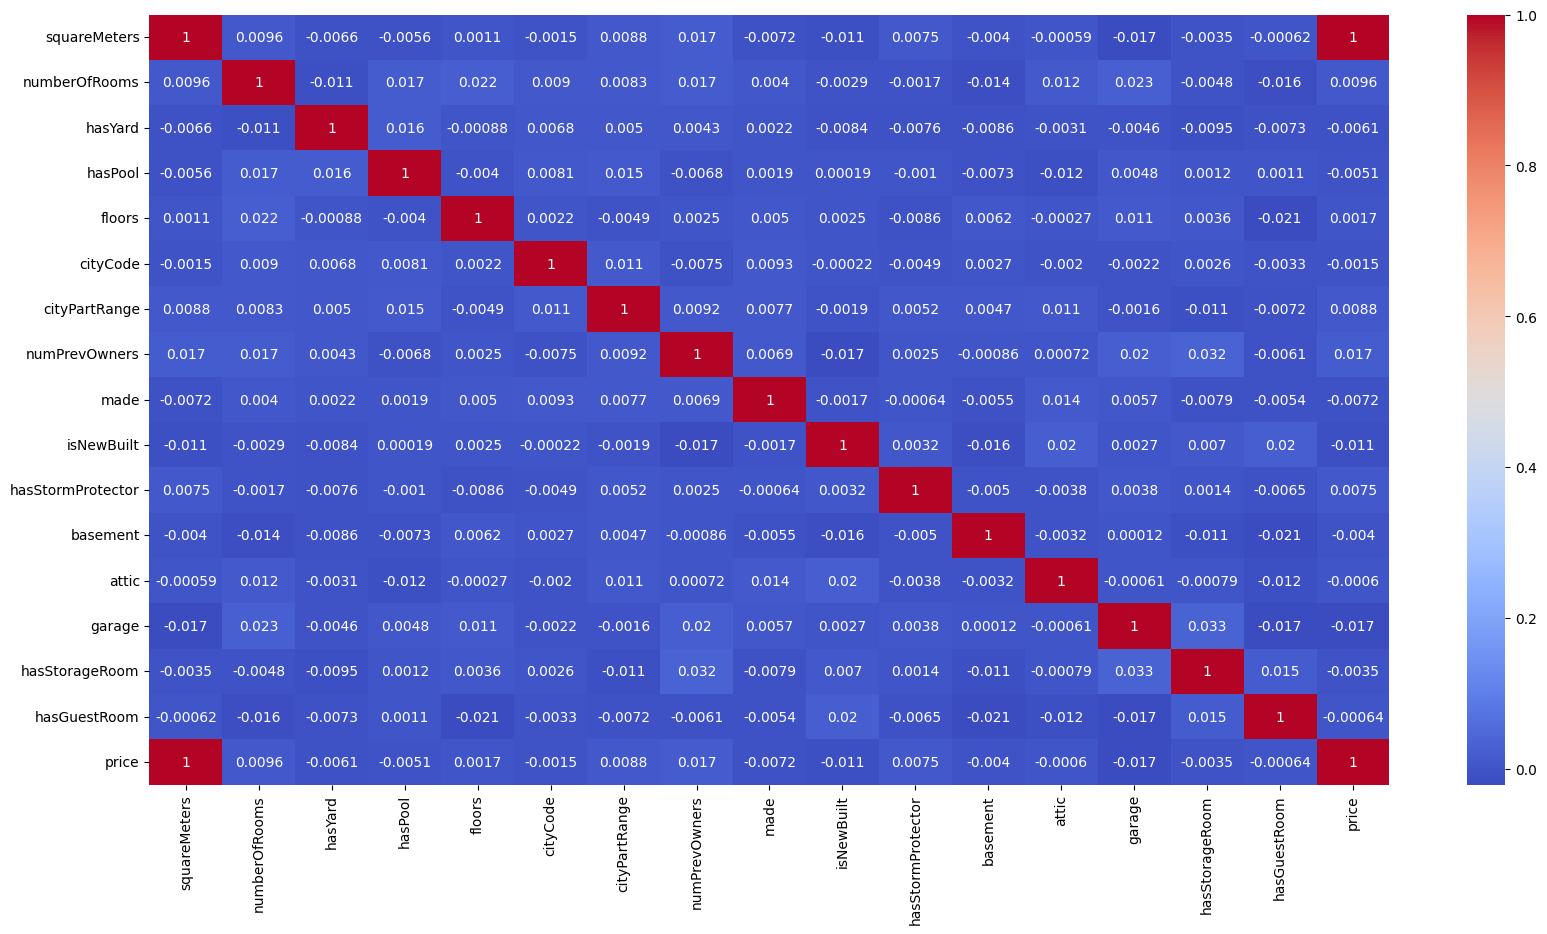

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_Price.corr(), annot=True, cmap='coolwarm')
plt.show()



* This code calculates correlations with price, sorts them, and visualizes the results in an interactive bar chart. It helps us quickly identify which features have the strongest relationships with housing prices in Paris, guiding our further analysis.

In [9]:
# Calculate correlations between all columns and price
corr = data_Price.corr()['price'].sort_values(ascending=False)

# Remove price from the corr
corr = corr[1:]

# Create a bar graph of the correlations using Plotly
fig = px.bar(corr,
             x=corr.index,
             y=corr.values,
             labels={'x': 'Features', 'y': 'Correlation with Price'},
             title='Correlation between Features and Price')

fig.show()



* This plot shows us how prices are spread across different ranges. Using 30 bins gives us a good balance of detail and clarity. It's crucial for identifying any skewness or unusual patterns in our price data.

In [10]:
# Histogram for 'price'
fig = px.histogram(data_Price, x='price', nbins=30, title='Distribution of Price')
fig.show()


* This graph shows us the median, quartiles, and any outliers in our price distribution. It's particularly useful for spotting extreme values that might influence our analysis of the Paris housing market.

In [11]:
# Box plot for 'price'
fig = px.box(data_Price, y='price', title='Box Plot of Price')
fig.show()


* This visualization helps us see how property size correlates with price in the Paris housing market. It can reveal trends, clusters, or any non-linear relationships between these two important variables.

In [15]:
# Scatter plot between squareMeters and price
fig = px.scatter(data_Price, x='squareMeters', y='price', title='Square Meters vs. Price')
fig.show()

* **The clear upward trend indicates a positive linear relationship between the two variables. As the square footage of the property increases, the price of the property also increases proportionally. This suggests that larger properties tend to be more expensive.**

* **This linear relationship is expected in real estate, as the size of a property is a significant determinant of its value. Larger properties generally offer more space, which is typically associated with higher utility and therefore higher prices.**



* This code groups our data by pool availability, calculates average prices, and visualizes the results. It helps us quickly see if having a pool significantly impacts property values in Paris.

In [18]:
# Group by and aggregation
grouped_df = data_Price.groupby('hasPool')['price'].mean().reset_index()

# Bar plot for grouped data
fig = px.bar(grouped_df, x='hasPool', y='price', labels={'price': 'Average Price'}, title='Average Price by Pool Availability')
fig.show()

## **Based on the above analysis, we have determined that the size in square meters is the primary determinant of the house price, while other factors have a relatively minor impact.**

# Model Training

* **In this crucial preprocessing stage, we're preparing our data for machine learning modeling. First, we import StandardScaler from sklearn, which will help us normalize our feature set. We then separate our dataset into features (X) and the target variable (y), which is the price we're aiming to predict. Finally, we apply StandardScaler to our features, which standardizes them by removing the mean and scaling to unit variance. This standardization is important as it puts all features on a similar scale, which can significantly improve the performance of many machine learning algorithms, especially those sensitive to the scale of input features.**

In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_Price.drop('price', axis=1)
y = data_Price['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* **Here, we're using sklearn's train_test_split function to divide our scaled features and target variable. We're allocating 80% of the data for training and 20% for testing, which is a common split ratio. The random_state ensures reproducibility of our results. This split allows us to train our model on one subset and evaluate its performance on unseen data, giving us a more realistic assessment of how it might perform in real-world scenarios.**

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

To explore various modeling approaches, I've imported a range of regression algorithms:

```python
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
```

This selection includes linear models like LinearRegression, Ridge, Lasso, and ElasticNet, which offer different regularization techniques. We're also considering Support Vector Regression (SVR) for its ability to handle non-linear relationships. Additionally, we've included ensemble methods like RandomForestRegressor and GradientBoostingRegressor, known for their robustness and high performance. This diverse set of models will allow us to compare different approaches and find the best fit for our Paris housing price prediction task.

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

To systematically evaluate our models, I've set up this training pipeline:

```python
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),  
    'Lasso Regression': Lasso(alpha=1),
    'Elastic Net': ElasticNet(alpha=1, l1_ratio=0.5),
    'Support Vector Regression': SVR(kernel='linear'),  
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')
```

Here, we're initializing seven different models with default or specified parameters. We then use a loop to train each model on our training data. This approach allows us to efficiently prepare multiple models for comparison, setting the stage for performance evaluation to determine the best predictor for Paris housing prices.

In [25]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1),
    'Elastic Net': ElasticNet(alpha=1, l1_ratio=0.5),
    'Support Vector Regression': SVR(kernel='linear'),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
  model.fit(X_train,y_train)
  print(f'{name} trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
Elastic Net trained
Support Vector Regression trained
Random Forest trained
Gradient Boosting trained


### Model Performance Evaluation

In this section, we evaluate the performance of different machine learning models applied to our dataset. The goal is to determine the effectiveness of each model in predicting real estate prices based on various features. We use key performance metrics including Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) score to assess each model.

The provided code snippet iterates over a dictionary of models, fits each model to the training data, and evaluates its performance on the test data. Below is a detailed explanation of the code:

The `results` dictionary is initialized to store the evaluation metrics for each model. The code then loops through each model in the `models` dictionary, performing the following steps for each model:

1. **Model Fitting**: The model is fitted on the training data (`X_train` and `y_train`).
2. **Prediction**: The target values for the test data (`X_test`) are predicted using the fitted model.
3. **RMSE Calculation**: The Root Mean Squared Error is calculated to measure the average magnitude of the prediction error.
4. **MAE Calculation**: The Mean Absolute Error is calculated to measure the average absolute difference between predicted and actual values.
5. **R² Score Calculation**: The R-squared score is calculated to determine the proportion of variance in the dependent variable that is predictable from the independent variables.
6. **Results Storage**: The calculated metrics (RMSE, MAE, and R² score) are stored in the `results` dictionary for each model.
7. **Metrics Display**: The performance metrics for each model are printed in a readable format.

This process provides a comprehensive assessment of each model's performance, facilitating the comparison and selection of the best model for predicting real estate prices.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}  # Dictionary to store results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R-squared': r2}
    print(f'{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}')

Linear Regression - RMSE: 1922.42, MAE: 1510.03, R-squared: 1.00
Ridge Regression - RMSE: 1957.13, MAE: 1543.14, R-squared: 1.00
Lasso Regression - RMSE: 1922.34, MAE: 1509.92, R-squared: 1.00
Elastic Net - RMSE: 998654.45, MAE: 868491.27, R-squared: 0.89
Support Vector Regression - RMSE: 2955057.97, MAE: 2570682.39, R-squared: 0.00
Random Forest - RMSE: 4001.35, MAE: 3187.22, R-squared: 1.00
Gradient Boosting - RMSE: 20174.35, MAE: 15288.70, R-squared: 1.00


**Printing Evaluation Metrics in a Table**

```python
# Print results in a table
results_df = pd.DataFrame(results).transpose()
print("\nEvaluation Metrics:\n", results_df.to_markdown(numalign="left", stralign="left"))
```

In this part of the project, we're displaying evaluation metrics in a structured table format. Let's break down what's happening here:

1. **Creating a DataFrame**: We start by converting the `results` dictionary into a Pandas DataFrame using `pd.DataFrame(results).transpose()`. This step organizes our evaluation metrics into rows and columns, making them easier to manage and display.

2. **Formatting as Markdown**: Next, we use `.to_markdown(numalign="left", stralign="left")` on our DataFrame. This function converts the DataFrame into Markdown format, which is a lightweight markup language with plain text formatting syntax. The parameters `numalign="left"` and `stralign="left"` ensure that numeric and string data align neatly in the table.

3. **Printing**: Finally, we print the formatted Markdown table preceded by a header message "\nEvaluation Metrics:\n". This header helps to clearly indicate what the following table represents—our evaluation metrics.

By using Pandas and Markdown, we can present our evaluation results in a professional and readable format, suitable for sharing with stakeholders or documenting our project's performance metrics.

---

In [27]:
# Print results in a table
results_df = pd.DataFrame(results).transpose()
print("\nEvaluation Metrics:\n", results_df.to_markdown(numalign="left", stralign="left"))


Evaluation Metrics:
 |                           | RMSE        | MAE         | R-squared   |
|:--------------------------|:------------|:------------|:------------|
| Linear Regression         | 1922.42     | 1510.03     | 1           |
| Ridge Regression          | 1957.13     | 1543.14     | 1           |
| Lasso Regression          | 1922.34     | 1509.92     | 1           |
| Elastic Net               | 998654      | 868491      | 0.886136    |
| Support Vector Regression | 2.95506e+06 | 2.57068e+06 | 0.00301281  |
| Random Forest             | 4001.35     | 3187.22     | 0.999998    |
| Gradient Boosting         | 20174.3     | 15288.7     | 0.999954    |


### Analysis:

- **Best RMSE and MAE**: The **Lasso Regression** model has the lowest RMSE (1922.34) and MAE (1509.92), which suggests it generally makes the closest predictions to the actual values compared to Linear and Ridge Regression.
  
- **R-squared**: All models (Linear, Ridge, and Lasso Regression) have an R-squared value of 1, indicating a perfect fit to the data. This is uncommon in practical scenarios and might indicate potential overfitting or data leakage issues depending on the context of your dataset.

- **Consideration for Complexity**: Lasso Regression, by its nature, performs feature selection by shrinking some coefficients to zero. This can be advantageous in reducing model complexity and improving interpretability, especially if your dataset has many irrelevant or redundant features.

- **Other Models**: Elastic Net, Support Vector Regression, Random Forest, and Gradient Boosting show varied performance. Random Forest and Gradient Boosting have very high R-squared values but higher RMSE and MAE compared to the linear models, which might indicate they capture more complex patterns but also introduce more prediction variance.

### Conclusion:

Based on the provided metrics and the context of your task:

- **Lasso Regression** appears to be the best choice among the listed models due to its lower RMSE and MAE, indicating better prediction accuracy on average.
  
- **Note**: It's crucial to validate these findings with further cross-validation or testing on unseen data to ensure the model's performance holds beyond the current evaluation metrics.